# Libraries declaration:

In [312]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import r2_score


## Function "load_dataset": 
Load a dataframe from a chosen .CSV file.

**Args:**
- `file_name` : the .csv file we want to load the data from to a dataframe.

**Returns:**
- A DataFrame which contains the data loded from the CSV file.

In [313]:
def load_dataset(file_name):
    return pd.read_csv(file_name, encoding="ISO-8859-8")

## Function "clean_dataset": 
clearing the dataframe from any duplicates,and data with missing values.

**Args:**
- `df` : unprocessed DataFrame

**Returns:**
- The DataFrame after removing any duplicates or rows with missing data values.

In [314]:
def clean_dataset(df):
    dfCopy = df.copy()
    dfCopy.dropna(inplace=True)
    dfCopy.drop_duplicates(inplace=True)
    return dfCopy

## Function "string_to_numbers": 
Change all unique values in chosen columns to integers.

**Args:**
- `df` : unprocessed DataFrame
- `col_arr` : array of columns to gether values from and turn into unique integer values.

**Returns:**
- The DataFrame after replacing all unique string values with unique integer values.

In [315]:
def string_to_numbers(df, col_arr):
    dfCopy = df.copy()
    col_vals = []
    for col in col_arr:
        col_vals = col_vals + list(dfCopy[col])
    unique_col_names = list(set(col_vals))
    unique_col_dict = {unique_col_names[value]: value for value in range(len(unique_col_names))}
    for col in col_arr:
        dfCopy = dfCopy.replace({col: unique_col_dict})
    return dfCopy

## Function "deivide_for_ml": 
Divides the data frame by columns for the machine learning study.

**Args:**
- `df` : a DataFrame
- `label_column` : column name to concentrate on and try and predict later.

**Returns:**
- `X` : all of the data frame no includint the 'label_column'
- `y` : all data in 'label_column' as data frame

In [316]:
def deivide_for_ml(df, label_column):
    X = df.loc[:, df.columns!=label_column]
    y = df.loc[:, df.columns==label_column]
    return X, y


## Function "split_to_train_and_test": 
split the data from before to 'training' and 'testing' sections.

**Args:**
- `X` : data for the ML to study from
- `y` : data for the ML to concentrate and predict
- `test_ratio` : how many of the data to take for testinf later between 0 and 1.
- `rand_state` : random value for choosing data for 'test' and 'learning'.

**Returns:**

- `X_train` : part of X to train the ML
- `X_test` : part of X to test the ML
- `y_train` : part of y to train the ML
- `y_test` : part of y to test the ML

In [317]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

## Function "train_1st_model": 
train a moudle with the data we gathered.

**Args:**
- `X_train` : the part of X for the ML to trin from.
- `y_train` : the part of y for the ML to trin from.

**Returns:**

- `reg` : the 'LinearRegression' we trained

In [319]:
def train_1st_model(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    return reg

## Function "predict_1st": 
predict the values after training the ML.

**Args:**
- `trained_1st_model` : the moudle the trained earlyer
- `X_test` : the part of X to test the muodle for resultes.

**Returns:**

- `y_pretict` : the predicted values we got from the moudle.

In [328]:
def predict_1st(trained_1st_model, X_test):
    y_pretict = trained_1st_model.predict(X_test)
    return y_pretict

## Function "evaluate_performance_1st": 
evaluate how good the moudle did using R^2 scoring

**Args:**
- `y_test` : the part of y to compare with the muodle resultes.
- `y_predicted` : the predicted values we got from the moudle.

**Returns:**

- the score of how well the moudle did (between 1 [best] to 0 [worst])

In [321]:
def evaluate_performance_1st(y_test,y_predicted):
    return r2_score(y_test, y_predicted)

***=========================================================================***

In [331]:
# Here we clean the data from any missing valuse and duplicates.
# also, replacing string values with unique integer values.

raw_df = load_dataset('product_file.csv')
clean_df = clean_dataset(raw_df)
clean_df = string_to_numbers(clean_df, ['Low_Place', 'High_Place'])
clean_df = string_to_numbers(clean_df, ['Category','Tab','Sub Tub','Products'])

In [332]:
# Dividing the data by categories.

categories = clean_df["Tab"].unique()
df_cheese          = clean_df[clean_df["Tab"] == categories[0]]
df_eggs            = clean_df[clean_df["Tab"] == categories[1]]
df_ice_cream       = clean_df[clean_df["Tab"] == categories[2]]
df_milk_and_drinks = clean_df[clean_df["Tab"] == categories[3]]
df_butter          = clean_df[clean_df["Tab"] == categories[4]]


In [333]:
# Creates a plot the get DataFrame and a column to target,
# the target column is the y and the rest of the DataFrame is the X.

def plot_gen(df, title, target_col):
    X, y = deivide_for_ml(df, target_col)
    X_1st_train, X_1st_test, y_1st_train, y_1st_test = split_to_train_and_test(X, y, 0.2, 41)
    trained_model_1st = train_1st_model(X_1st_train, y_1st_train)
    pred_1st_vals = predict_1st(trained_model_1st, X_1st_test)
    y_pred_1st= pd.Series([x[0] for x in pred_1st_vals],index=X_1st_test.index)
    eval_res_1st = evaluate_performance_1st(y_1st_test, y_pred_1st)
    plt.title(f'\n{title}\n\nR^2 score of {str("{:.3f}".format(eval_res_1st*100))}%',fontsize=30)
    plt.xlabel("[ samples ]",fontsize=20)
    plt.ylabel("[ Price ]",fontsize=20)
    x_high = y_1st_test[300:500]
    y_high = [val for val in range(1,len(x_high)+1)]
    plt.plot(y_high, x_high, marker='.', linestyle='--', color='red', label='Test')
    x_high = y_pred_1st[300:500]
    y_high = [val for val in range(1,len(x_high)+1)]
    plt.plot(y_high, x_high, marker='.', linestyle='--', color='blue', label='Predict')
    plt.grid(linestyle = '--', linewidth = 0.75, axis='both')
    plt.legend(title='Legend:',title_fontsize=30,loc='upper right', prop = {'size':20})

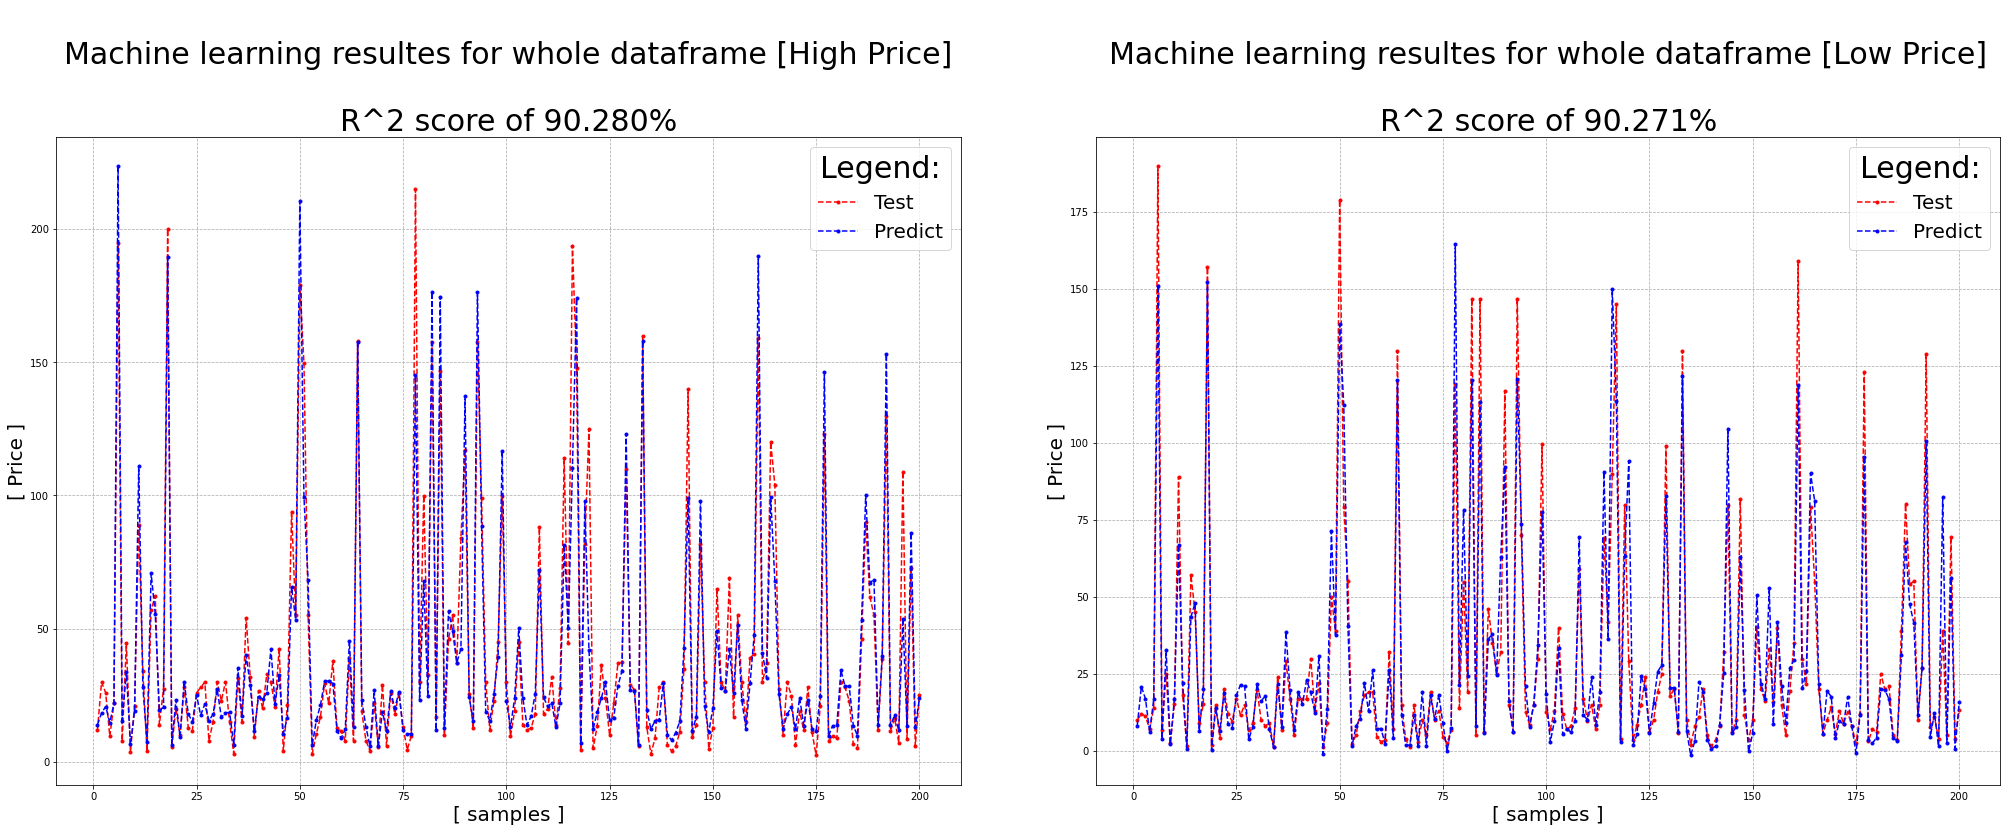

In [334]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for all our data set.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(clean_df, 'Machine learning resultes for whole dataframe [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(clean_df, 'Machine learning resultes for whole dataframe [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.15,  hspace=0.0)

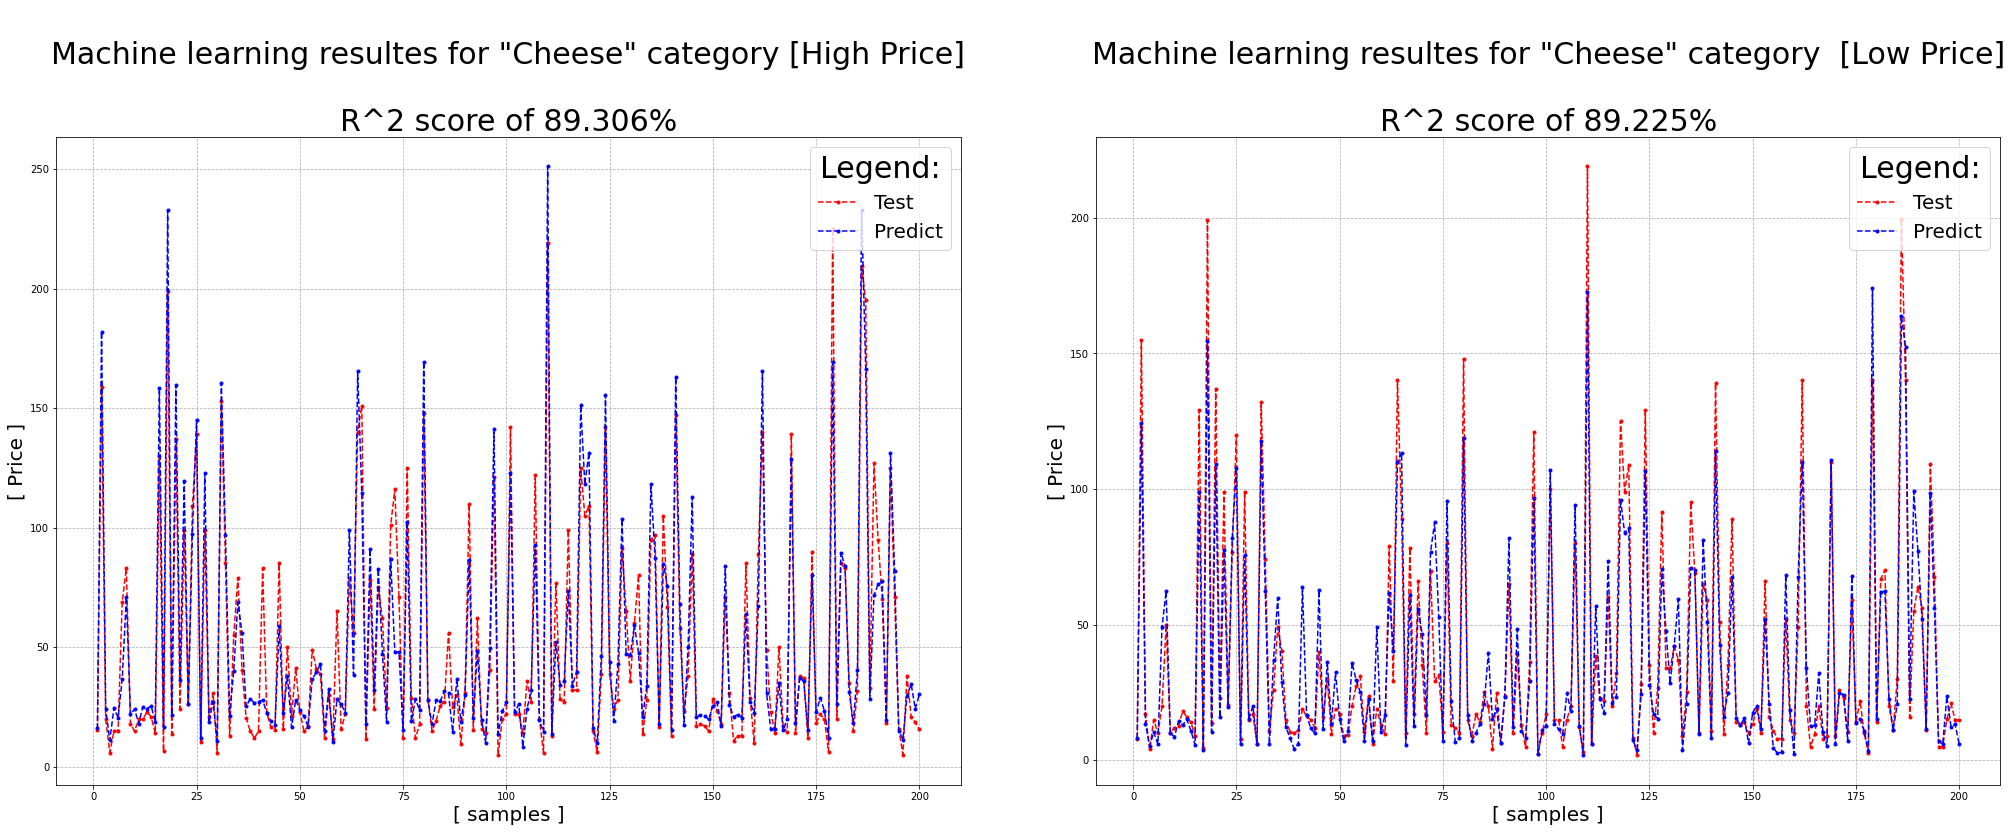

In [335]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for the 'cheese' category.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(df_cheese, 'Machine learning resultes for "Cheese" category [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(df_cheese, 'Machine learning resultes for "Cheese" category  [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.15,  hspace=0.0)

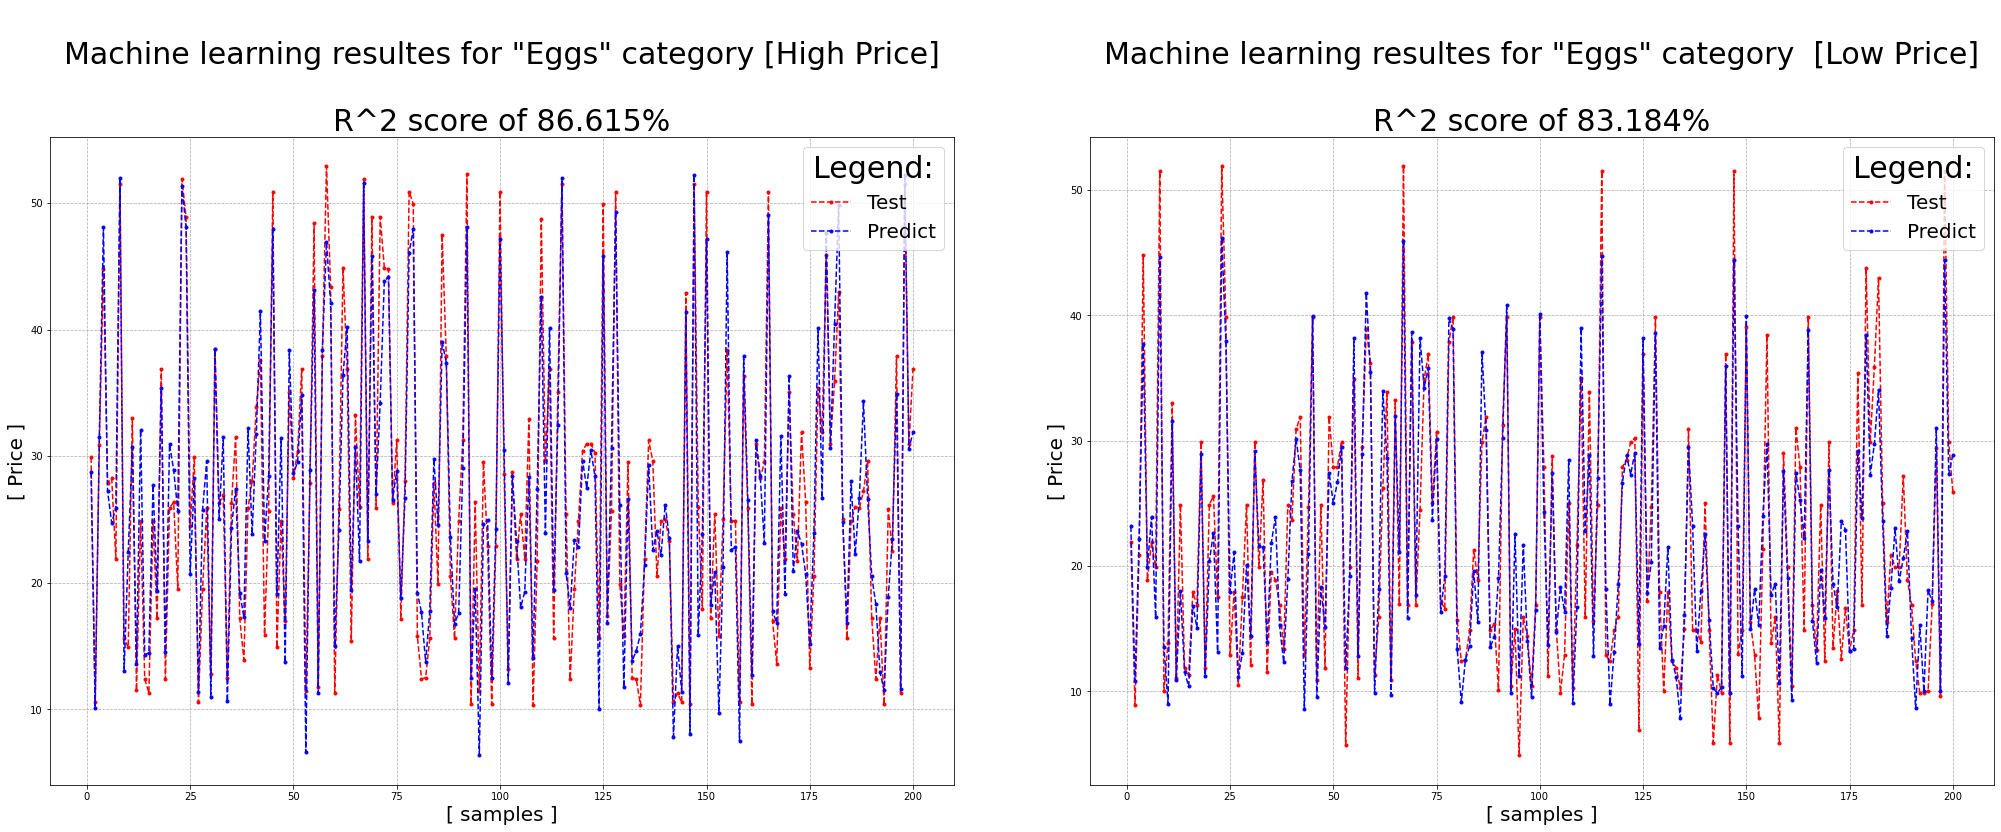

In [336]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for the 'eggs' category.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(df_eggs, 'Machine learning resultes for "Eggs" category [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(df_eggs, 'Machine learning resultes for "Eggs" category  [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.15,  hspace=0.0)

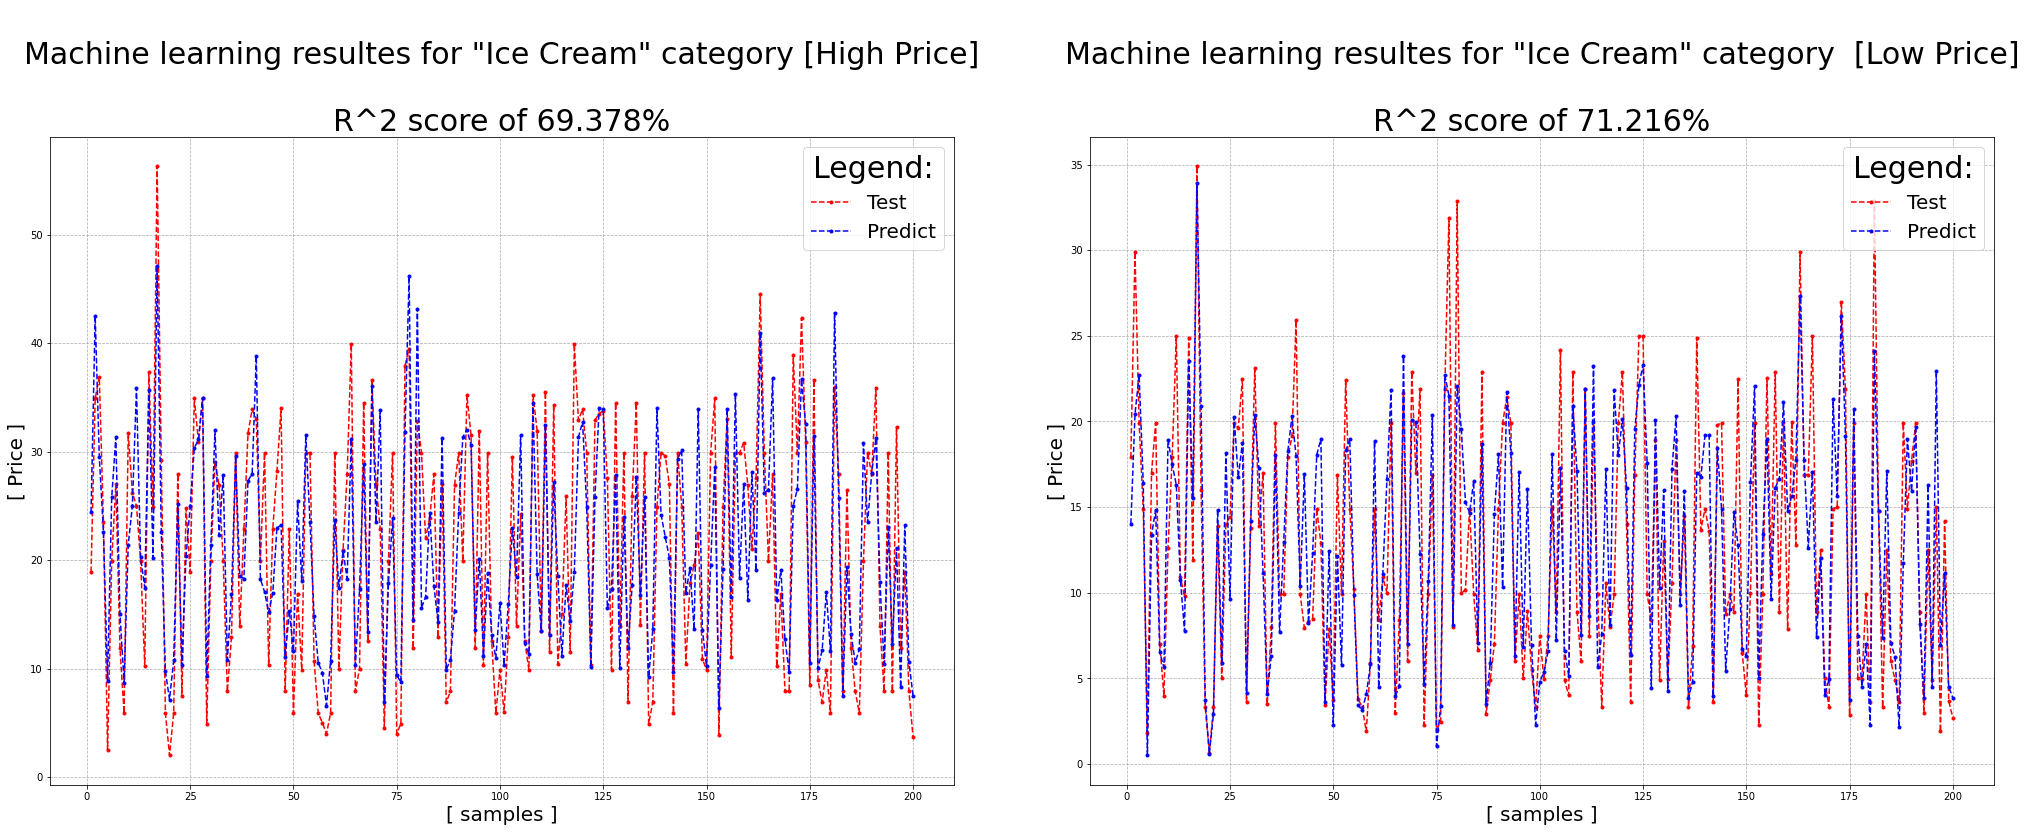

In [337]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for the 'ice cream' category.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(df_ice_cream, 'Machine learning resultes for "Ice Cream" category [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(df_ice_cream, 'Machine learning resultes for "Ice Cream" category  [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.15,  hspace=0.0)

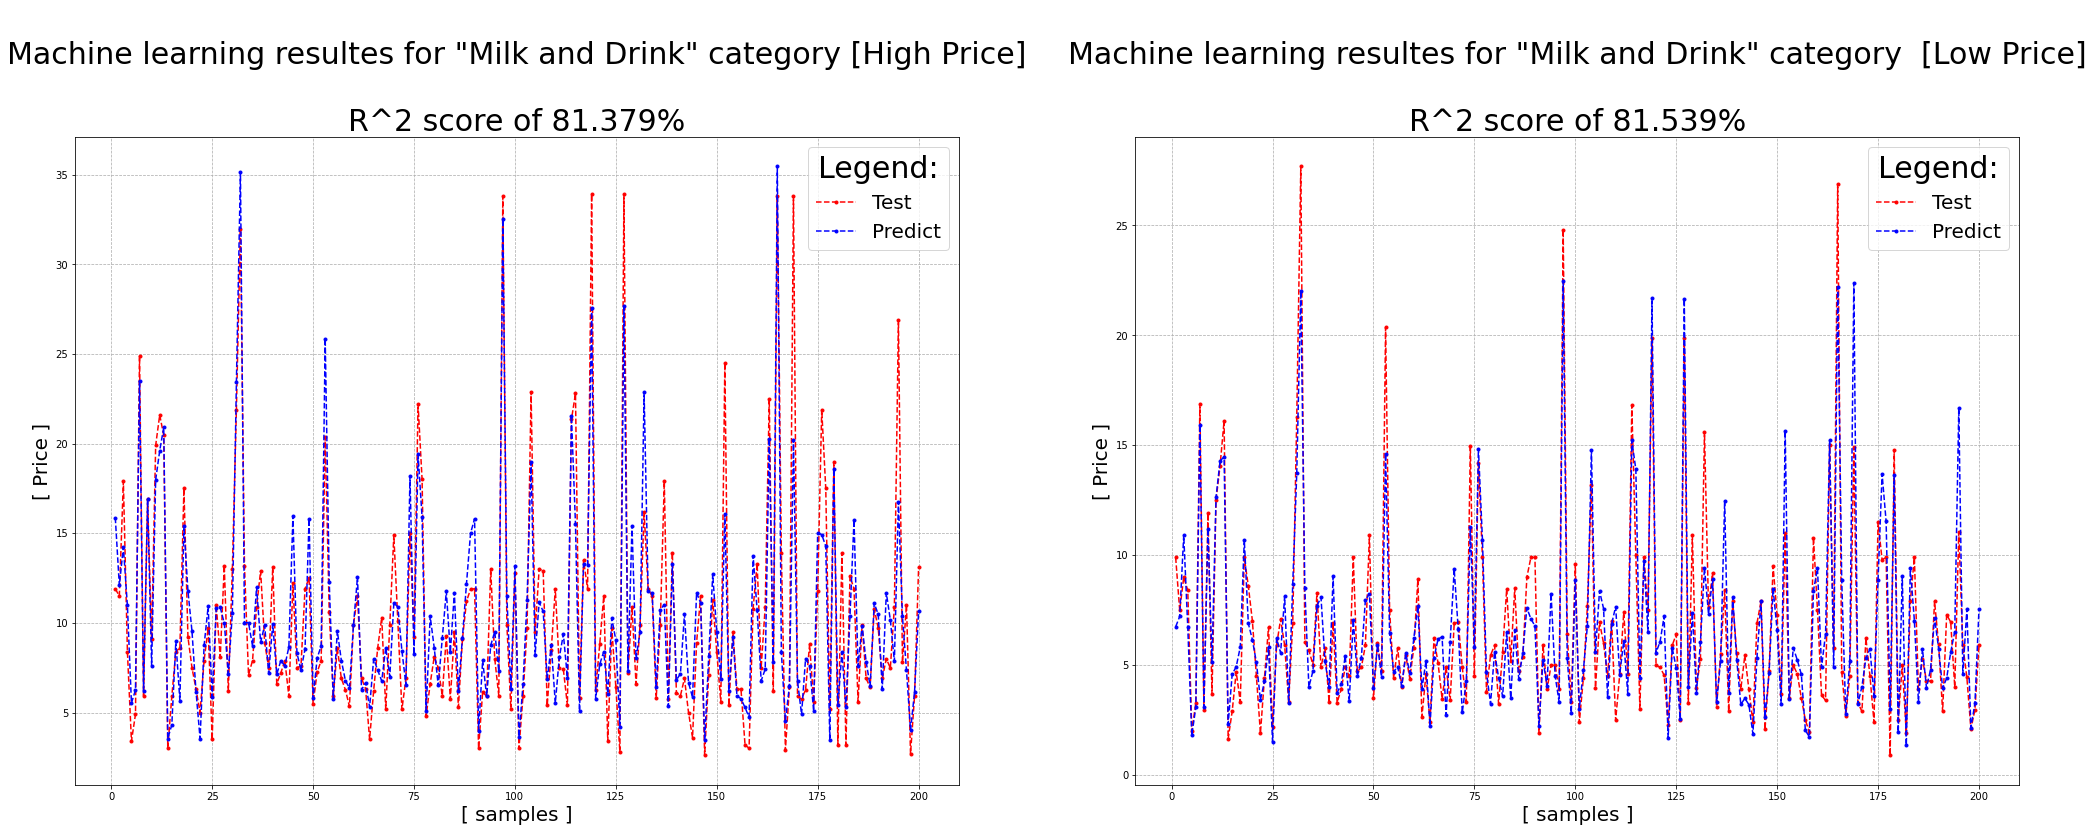

In [338]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for the 'milk and drinks' category.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(df_milk_and_drinks, 'Machine learning resultes for "Milk and Drink" category [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(df_milk_and_drinks, 'Machine learning resultes for "Milk and Drink" category  [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.2,  hspace=0.0)

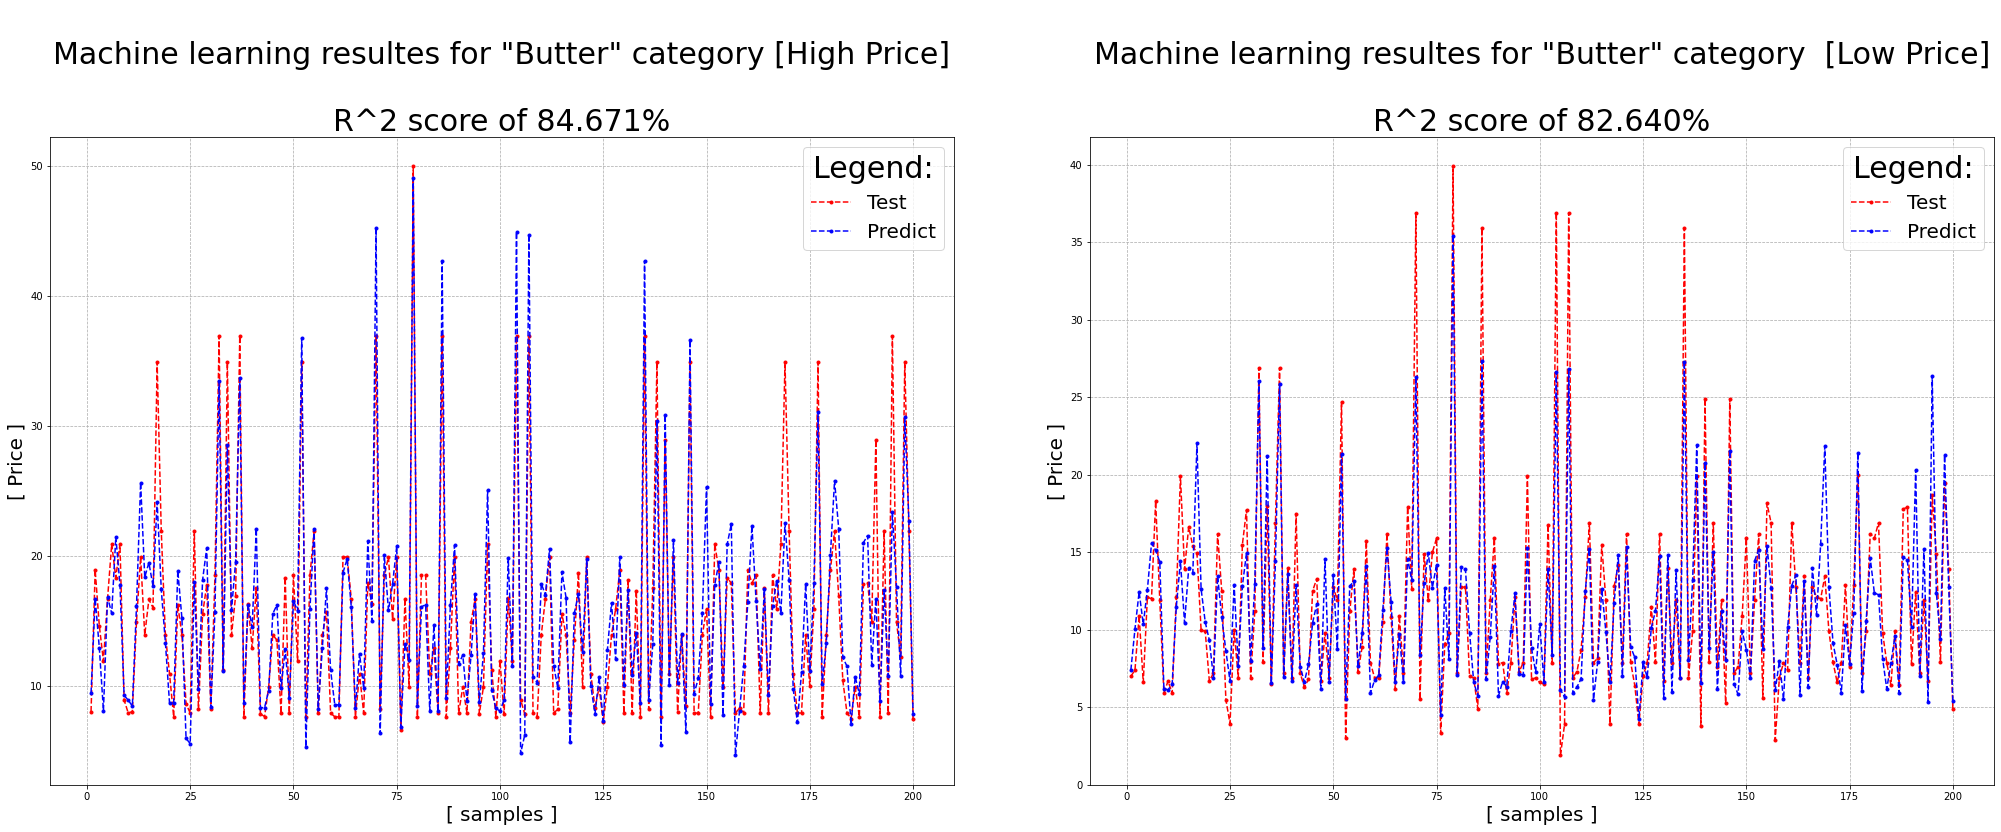

In [339]:
# Display part of the data used for training against the predicted data (with the R^2 score)
# This plot displaying High and Low prices for the 'butter' category.

plt.figure(figsize=(30, 10))

plt.subplot(1,2,1)
plot_gen(df_butter, 'Machine learning resultes for "Butter" category [High Price]', 'High_Price')

plt.subplot(1,2,2)
plot_gen(df_butter, 'Machine learning resultes for "Butter" category  [Low Price]', 'Low_Price')

plt.subplots_adjust(left=0.0, bottom=0.0,  right=0.9,  top=0.9,  wspace=0.15,  hspace=0.0)